In [ ]:
# importing libraries
import cv2
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from keras import backend as k
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
k.set_image_data_format('channels_last')
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Dropout,GlobalMaxPooling2D
from keras.preprocessing.image import load_img
print("tf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)
%matplotlib inline 



tf.__version__ is 2.3.0
tf.keras.__version__ is: 2.4.0


In [ ]:
train_path = '/content/drive/My Drive/New folder/images/train'
validation_path = '/content/drive/My Drive/New folder/images/val'

In [ ]:
# Uusing a covnet model
def covnet_model():
  model = Sequential()
  model.add(Conv2D(32, (2, 2), activation='relu',
  input_shape=(150, 150, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (2, 2), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (2, 2), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(512, (2, 2), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(1024, (2, 2), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model


In [ ]:
# Using a pre_trained model VGG
def vgg_model():
  image_size = [224 , 224]

  # Adding preprocessing layer to the front of the VGG
  vgg = VGG16(input_shape= image_size + [3],weights='imagenet',include_top = False)

  # not training the existing weights or parameter
  for layer in vgg.layers:
    layer.trainable = False

  x = Flatten()(vgg.output)
  x = Dense(1024,activation = 'relu')(x)
  prediction = Dense(3,activation='softmax')(x)
  model = Model(inputs= vgg.input,outputs=prediction)
  model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics= ['accuracy'])
  
  return model


In [ ]:
# Run Train and eval Model 
def conv_train_eval():
  epochs = 25
  batch_size = 5
  size = 150
  # this is the augmentation configuration we will use for training
  train_datagen = ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True)

  # this is the augmentation configuration we will use for testing:
  # only rescaling
  test_datagen = ImageDataGenerator(rescale=1./255)

  # this is a generator that will read pictures found in
  # subfolers of 'data/train', and indefinitely generate
  # batches of augmented image data
  train_set = train_datagen.flow_from_directory(
          train_path,  # this is the target directory
          target_size=(size, size),  # all images will be resized to 150x150
          batch_size=batch_size,
          class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

  # this is a similar generator, for validation data
  validation_set = test_datagen.flow_from_directory(
          validation_path,
          target_size=(size, size),
          batch_size=batch_size,
          class_mode='categorical')
  model = covnet_model()
  hist_covnet = model.fit_generator(
          train_set,
          steps_per_epoch=len(train_set)// batch_size,
          epochs=10,
          validation_data=validation_set,
          validation_steps=len(validation_set)// batch_size)
  return (model,hist_covnet,train_set,validation_set)

In [ ]:
# Run Train and eval Model 
def vgg_train_eval():
  batch_size = 5
  size = 224
  # this is the augmentation configuration we will use for training
  train_datagen = ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True)

  # this is the augmentation configuration we will use for testing:
  # only rescaling
  test_datagen = ImageDataGenerator(rescale=1./255)

  # this is a generator that will read pictures found in
  # subfolers of 'data/train', and indefinitely generate
  # batches of augmented image data
  train_set = train_datagen.flow_from_directory(
          train_path,
          target_size=(size, size),  # all images will be resized to 150x150
          batch_size=batch_size,
          class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

  # this is a similar generator, for validation data
  validation_set = test_datagen.flow_from_directory(
          validation_path,
          target_size=(size, size),
          batch_size=batch_size,
          class_mode='categorical')
  model = vgg_model()
  hist_vgg = model.fit_generator(
          train_set,
          steps_per_epoch=len(train_set)// batch_size,
          epochs=25,
          validation_data=validation_set,
          validation_steps=len(validation_set)// batch_size)
  print(model.evaluate(validation_set,steps = len(validation_set)//5,verbose = 2))
  
  
  return (model,hist_vgg,train_set,validation_set)

In [ ]:
def plot_summaries(history ):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,8))
    ax1.set_title('Cross Entropy Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.plot(history.history['loss'], color='blue', label='train')
    ax1.plot(history.history['val_loss'], color='orange', label='test')
    ax1.legend()
    # plot accuracy
    ax2.set_title('Classification Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.plot(history.history['accuracy'], color='blue', label='train')
    ax2.plot(history.history['val_accuracy'], color='orange', label='test')
    ax2.legend()
    plt.tight_layout()
    

In [ ]:
vgg_model()

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
(model,hist,train_set,validation_set)= vgg_train_eval()

Found 470 images belonging to 3 classes.
Found 209 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
18/18 [==============================] - 72s 4s/step - loss: 12.0686 - accuracy: 0.3667 - val_loss: 4.7006 - val_accuracy: 0.4250
Epoch 2/25
18/18 [==============================] - 55s 3s/step - loss: 0.8659 - accuracy: 0.7889 - val_loss: 0.6025 - val_accuracy: 0.9250
Epoch 3/25
18/18 [==============================] - 49s 3s/step - loss: 0.8725 - accuracy: 0.8667 - val_loss: 0.3520 - val_accuracy: 0.8250
Epoch 4/25
18/18 [==============================] - 42s 2s/step - loss: 1.6972 - accuracy: 0.7222 - val_loss: 0.2858 - val_accuracy: 0.9000
Epoch 5/25
18/18 [==============================] - 23s 1s/step - loss: 0.4186 - accuracy: 0.8889 - val_loss: 0.4407 - val_accuracy: 0.8750
Epoch 6/25
18/18 [==============================] - 23s 1s/step - loss: 0.5489 - accuracy: 0.8667 - val_loss: 0.0319 - val_accuracy: 0.9750
E

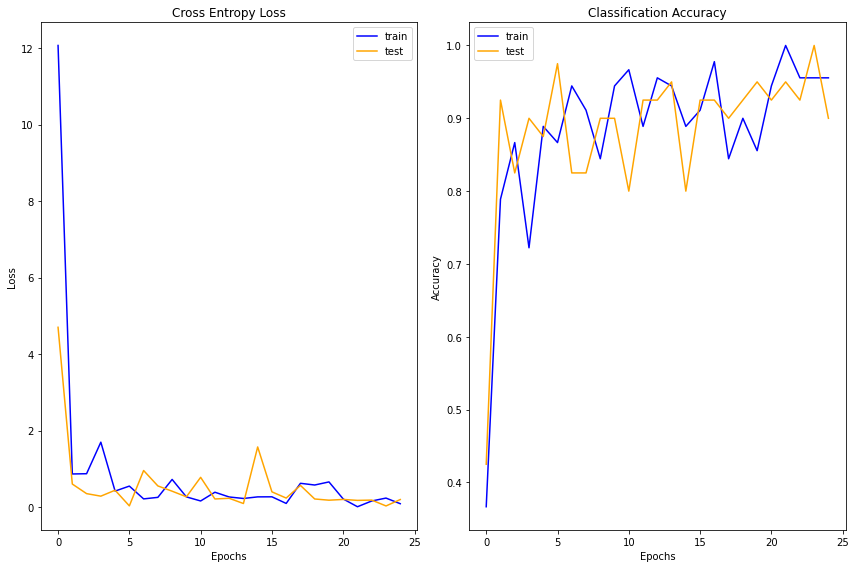

In [ ]:
plot_summaries(hist)

In [ ]:
from keras.models import load_model
model.save('facefeatures_model_1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: facefeatures_model_1/assets


In [ ]:
# importing cv2 to process the image data
import cv2

# loading cascades
# cascade enables the selection of the frontalface
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# cropping the area of the face to be examined
# img should be an array ie from imread or load_image
def face_extractor(img_dir):
  # fuction detects the faces and returns the cropped face
  # if no face detected , it returns the input image 
  dir = img_dir
  from keras_preprocessing import image 
  img = image.load_img(dir,
        target_size=(250,250))
  img = np.asarray(img)
  rgb_img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  faces = face_cascade.detectMultiScale(img,1.3,5)
  for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # the location of the parts of the face i
    cropped_face = rgb_img[y:y+h , x:x+w]
    loc = cv2.rectangle(rgb_img,(x,y),(x+w,y+h),(255,0,0),2)
  return (x,y,w,h),loc
   
  #return cropped_face

# importing cv2_imshow from google.colab.patches instead of using the cv2.imshow  directly 
# due to it inability in google colab
from google.colab.patches import cv2_imshow

def face_identification(img_dir):
  from keras_preprocessing import image 
  try:
    name = ['Leonardo','Robert Jr', 'Eliza']
    img = image.load_img(img_dir,
          target_size=(224,224))
    img = np.asarray(img)
    img = np.expand_dims(img,axis=0)
    from keras.models import load_model
    saved_model = load_model('/content/facefeatures_model_1')
    output = saved_model.predict(img)
    loc,crop_rec = face_extractor(img_dir)
    image = crop_rec
    if (output[0][0] > 0.5 ):
        name = name[0]
        cv2.putText(image,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    elif (output[0][1] > 0.5 ):
      name = name[1]
      cv2.putText(image,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    elif (output[0][2] > 0.5 ):
      name = name[2]
      cv2.putText(image,name,(25,25),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,255,0),1)
    else:
      name = 'Unknown'
      cv2.putText(image,name,(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
    cv2_imshow(image)
  except :
    pass
    print('Use a valid image with a compatible dimension')

In [ ]:
def image_identification(image):
  image = image
  name = ['Leonardo','Robert Jr', 'Eliza']
  img_1 = load_img(image,
        target_size=(224,224))
  img = cv2.imread(image)
  plt.imshow(img)
  img_1 = np.asarray(img_1)
  img_1 = np.expand_dims(img_1,axis=0)
  from keras.models import load_model
  saved_model = load_model('/content/facefeatures_model_1')
  output = saved_model.predict(img_1)
  print(output)
  print(np.argmax(output))
  if (output[0][0] > 0.5):
    print(name[0])
  elif (output[0][1] > 0.5):
    print(name[1])
  elif (output[0][2] > 0.5):
    print(name[2])
  else:
    print('Unknown')

[[1. 0. 0.]]
0
Leonardo


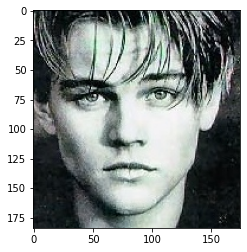

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/Leonardo DiCaprio89_2702.jpg')

[[0.00182587 0.9981741  0.        ]]
1
Robert Jr


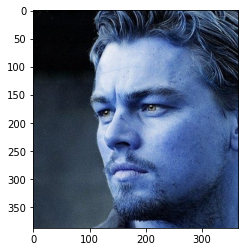

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/Leonardo DiCaprio91_2705.jpg')
# failure to classify this particular image due limited training on side faces

[[0. 1. 0.]]
1
Robert Jr


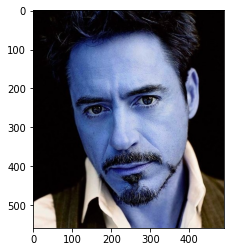

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/Robert Downey Jr28_4264.jpg')

[[0.00127207 0.998728   0.        ]]
1
Robert Jr


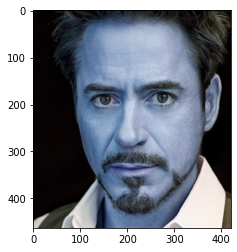

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/Robert Downey Jr40_4271.jpg')

[[0. 1. 0.]]
1
Robert Jr


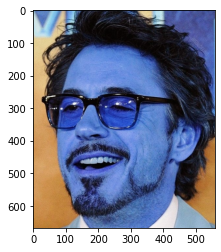

In [ ]:
image_identification('/content/Robert Downey Jr11_4090.jpg')

[[0. 1. 0.]]
1
Robert Jr


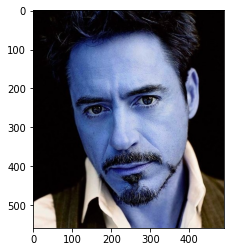

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/Robert Downey Jr28_4264.jpg')

[[0. 1. 0.]]
1
Robert Jr


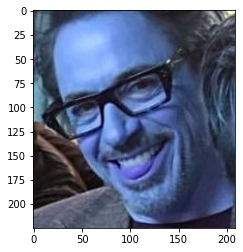

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/Robert Downey Jr29_4265.jpg')

[[0. 0. 1.]]
2
Eliza


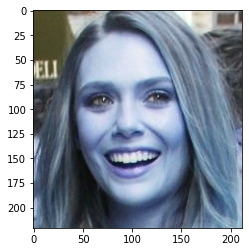

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/elizabeth olsen15_1159.jpg')

[[0. 0. 1.]]
2
Eliza


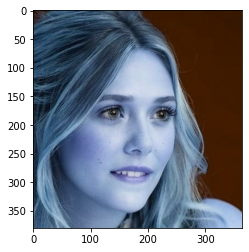

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/elizabeth olsen16_1168.jpg')

[[0. 0. 1.]]
2
Eliza


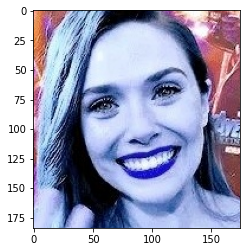

In [ ]:
image_identification('/content/drive/My Drive/New folder/images/testing/elizabeth olsen9_1323.jpg')